## 1) mention about problem statement
## 2) talk about columns
## 3)install the modules and required libraries
## 4)Load data set
## 5)understand your data
## 6)EDA
## i)univariate analysis
##  ii)Bi-variate analysis
##  iii)Multivarivate analysis
## 7)check the null-values or missing values
## i)treating the null values(fill with mean or median or mode)
## ii)drop null values if they are less than 5%-10%
## 8)check the duplicates
## i)drop duplicates
## 9)treating the ouliers
## i)check the outliers 
## ii)remove outliers
## iii)make the box plot before and after the outliers
## 10)Feature engineering
## a)i)extract the features
##  ii)create the features
##  iii)select the features
## b)checking the multicoliniarity
## i)heat map
## ii)vif technique
## c)transformation
## i)one hot encoding or label encoding
## d)scaling(min_max_scalar)
## 11)X-y features split
## 12)train test split


### for classification
## 1)apply smote technique
## 2)build the models
##  ii)decision tree
##  iii)Random forest
##  iV)gradient boost
##  v)ada boost
##  vi)knn
##  vii)svm
##  viii)naive bayes
##  4)deploy the best model in streamlit or flask


 #### for regression
##  ##  ##  ##  ##  ##  ## 1)apply models
##  ##  ##  ##  ##  ##  i)linear regression
##  ##  ##  ##  ##  ii)decision tree
##  ##  ##  ## iii)random forest
 ##  ##  ## iv)gradient boost
##  ##  ##  v)knn
##  vi)svm

##  ##  2)Hyper parameter tuning
##   i)cross validation
##  3)deploy the best model in streamlit or flask

#### clustering
##  1)apply the models
##    i)k-means
##    ii)DBSCAN
##    iii)Hierachical
##  2)deploy the best model in streamlit or flask


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [3]:
data = pd.read_csv('bank_transactions.csv')
dt = data.copy()
df = dt.sample(100000)
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
928060,T928061,C7531528,29/12/85,M,PATIALA,14085.82,11/9/16,164804,500.00
710052,T710053,C5327943,2/10/94,M,NEW DELHI,6125.17,3/9/16,91719,70.00
304510,T304511,C6227353,24/12/39,F,KOLKATA,6382.71,10/8/16,162803,401.40
1044960,T1044961,C6144377,2/6/63,M,GURGAON,2005.37,18/9/16,95041,400.00
47330,T47331,C5223128,18/7/80,M,RAIGARH,49961.81,3/8/16,140520,410.00
...,...,...,...,...,...,...,...,...,...
40213,T40214,C3642612,4/9/96,M,GUWAHATI,5900.05,22/9/16,163107,366.00
909297,T909298,C4538255,19/2/65,M,BANGALORE,98360.94,12/9/16,110109,500.00
19280,T19281,C2728954,10/10/86,M,DELHI,7100.47,26/9/16,191735,250.00
220921,T220922,C4230931,16/3/91,M,BAMBOLIM,8530.67,8/8/16,212650,257.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 928060 to 378168
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   TransactionID            100000 non-null  object 
 1   CustomerID               100000 non-null  object 
 2   CustomerDOB              99675 non-null   object 
 3   CustGender               99882 non-null   object 
 4   CustLocation             99980 non-null   object 
 5   CustAccountBalance       99759 non-null   float64
 6   TransactionDate          100000 non-null  object 
 7   TransactionTime          100000 non-null  int64  
 8   TransactionAmount (INR)  100000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 7.6+ MB


In [5]:
df.isna().sum()

TransactionID                0
CustomerID                   0
CustomerDOB                325
CustGender                 118
CustLocation                20
CustAccountBalance         241
TransactionDate              0
TransactionTime              0
TransactionAmount (INR)      0
dtype: int64

In [6]:
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,9.975900e+04,100000.000000,100000.000000
mean,1.161214e+05,156955.998110,1558.102661
std,9.292905e+05,51097.608836,5517.063280
min,0.000000e+00,2.000000,0.000000
25%,4.761420e+03,123907.750000,163.000000
50%,1.696345e+04,163948.000000,469.000000
75%,5.841823e+04,195926.250000,1200.000000
max,1.150355e+08,235959.000000,286100.120000


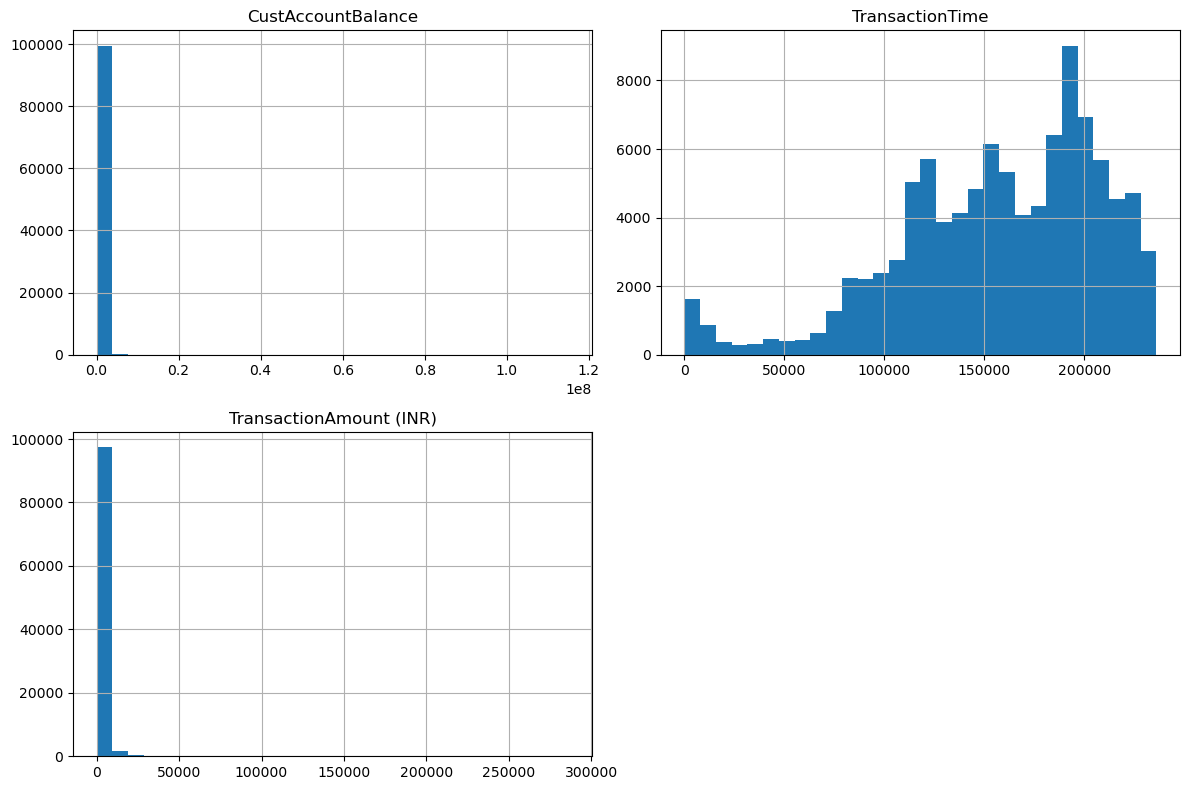

In [7]:
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

In [8]:
df = df.dropna(subset=['CustAccountBalance'])

In [9]:
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'], errors='coerce')
df['Age'] = 2025 - df['CustomerDOB'].dt.year
df['Age'].fillna(df['Age'].median(), inplace=True)
df.drop(columns=['CustomerDOB'],inplace=True)
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
928060,T928061,C7531528,M,PATIALA,14085.82,11/9/16,164804,500.0,40.0
710052,T710053,C5327943,M,NEW DELHI,6125.17,3/9/16,91719,70.0,31.0
304510,T304511,C6227353,F,KOLKATA,6382.71,10/8/16,162803,401.4,-14.0
1044960,T1044961,C6144377,M,GURGAON,2005.37,18/9/16,95041,400.0,-38.0
47330,T47331,C5223128,M,RAIGARH,49961.81,3/8/16,140520,410.0,45.0


In [10]:
df['CustGender'].fillna(df['CustGender'].mode()[0], inplace=True)
df['CustLocation'].fillna(df['CustLocation'].mode()[0],inplace=True)

In [11]:
df.isna().sum()

TransactionID              0
CustomerID                 0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
Age                        0
dtype: int64

In [12]:
df['TransactionDate']= pd.to_datetime(df['TransactionDate'],errors='coerce')
df['TransactionYear']= df['TransactionDate'].dt.year
df['TransactionMonth']= df['TransactionDate'].dt.month
df['TransactionDay']= df['TransactionDate'].dt.day

In [13]:
df['TransactionHours']= df['TransactionTime'] // 10000

In [14]:
df.drop(columns = ['TransactionDate','TransactionTime'], inplace=True )
df.head()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
928060,T928061,C7531528,M,PATIALA,14085.82,500.0,40.0,2016,11,9,16
710052,T710053,C5327943,M,NEW DELHI,6125.17,70.0,31.0,2016,3,9,9
304510,T304511,C6227353,F,KOLKATA,6382.71,401.4,-14.0,2016,10,8,16
1044960,T1044961,C6144377,M,GURGAON,2005.37,400.0,-38.0,2016,9,18,9
47330,T47331,C5223128,M,RAIGARH,49961.81,410.0,45.0,2016,3,8,14


In [15]:
lb = LabelEncoder()
df['CustGender']=lb.fit_transform(df['CustGender'])
df['CustLocation']=lb.fit_transform(df['CustLocation'])
df['TransactionID']=lb.fit_transform(df['TransactionID'])
df['CustomerID']=lb.fit_transform(df['CustomerID'])

In [16]:
df

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
928060,92101,79377,1,2990,14085.82,500.00,40.0,2016,11,9,16
710052,69204,52611,1,2715,6125.17,70.00,31.0,2016,3,9,9
304510,26183,63368,0,2021,6382.71,401.40,-14.0,2016,10,8,16
1044960,4667,62673,1,1473,2005.37,400.00,-38.0,2016,9,18,9
47330,44210,51272,1,3194,49961.81,410.00,45.0,2016,3,8,14
...,...,...,...,...,...,...,...,...,...,...,...
40213,36607,32500,1,1485,5900.05,366.00,29.0,2016,9,22,16
909297,90018,43206,1,371,98360.94,500.00,-40.0,2016,12,9,11
19280,14245,21150,1,1003,7100.47,250.00,39.0,2016,9,26,19
220921,17225,39383,1,353,8530.67,257.00,34.0,2016,8,8,21


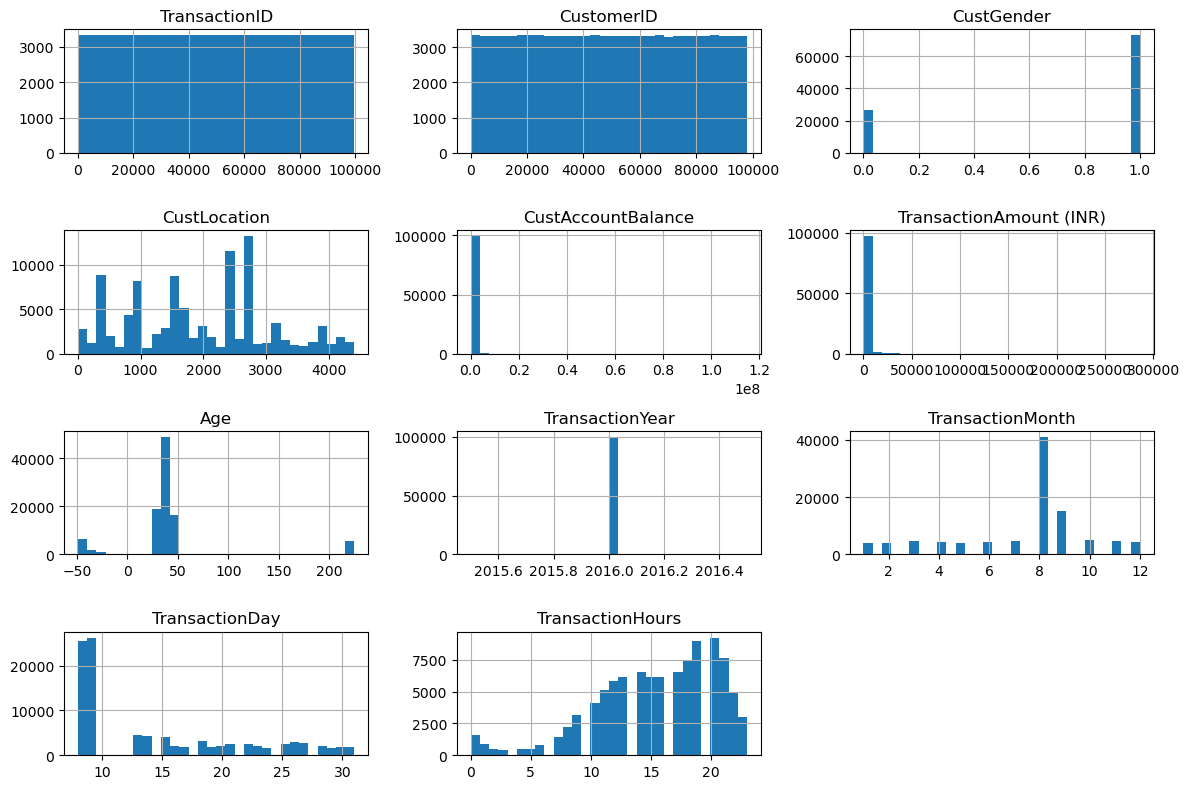

In [17]:
df.hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

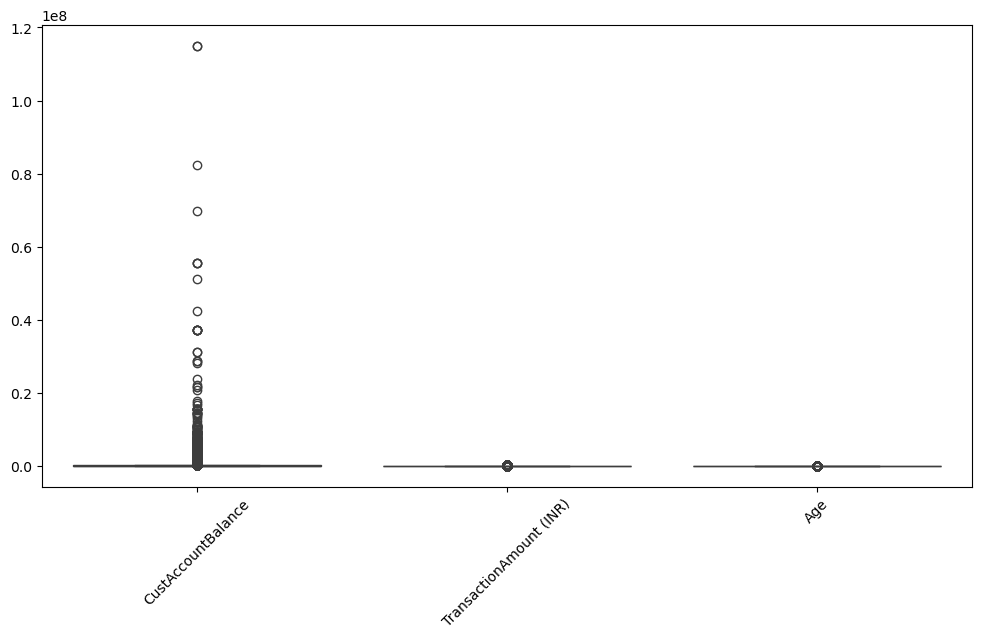

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['CustAccountBalance','TransactionAmount (INR)','Age']])
plt.xticks(rotation=45)
plt.show()

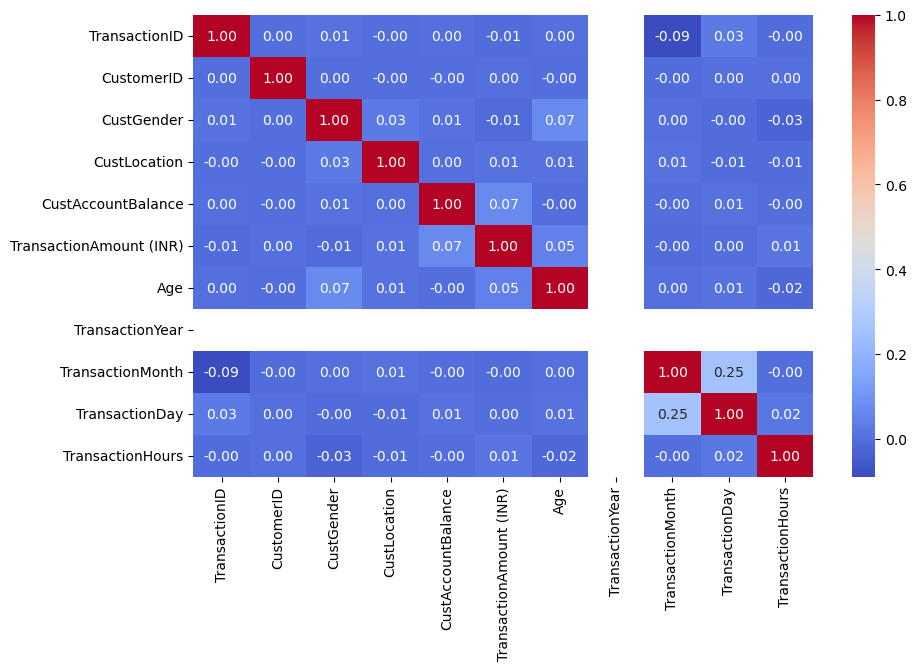

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


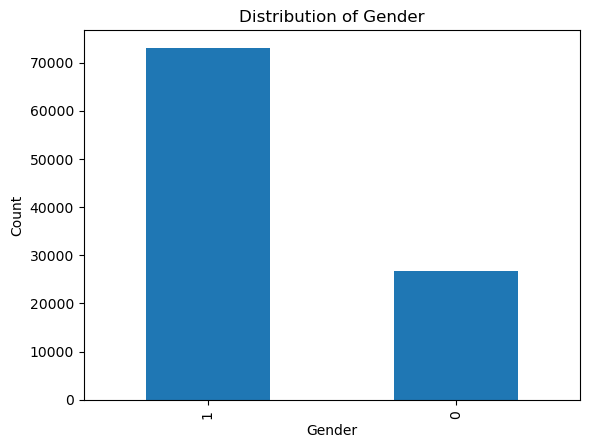

In [20]:
df['CustGender'].value_counts().plot(kind='bar')
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [21]:
fet=['CustGender','CustLocation','CustAccountBalance','TransactionAmount (INR)','Age','TransactionYear','TransactionMonth',
     'TransactionDay','TransactionHours']
scl=StandardScaler()
df_scl = scl.fit_transform(df[fet])
df_scl = pd.DataFrame(df_scl,columns=fet)
df_scl.head()

,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
0,0.604578,0.935170,-0.109800,-0.192607,-0.005599,0.0,1.380379,-0.744691,0.117844
1,0.604578,0.687731,-0.118366,-0.271177,-0.182794,0.0,-1.668314,-0.744691,-1.251610
2,-1.654047,0.063286,-0.118089,-0.210623,-1.068769,0.0,0.999293,-0.881702,0.117844
3,0.604578,-0.429792,-0.122800,-0.210879,-1.541290,0.0,0.618206,0.488407,-1.251610
4,0.604578,1.118725,-0.071194,-0.209052,0.092843,0.0,-1.668314,-0.881702,-0.273429


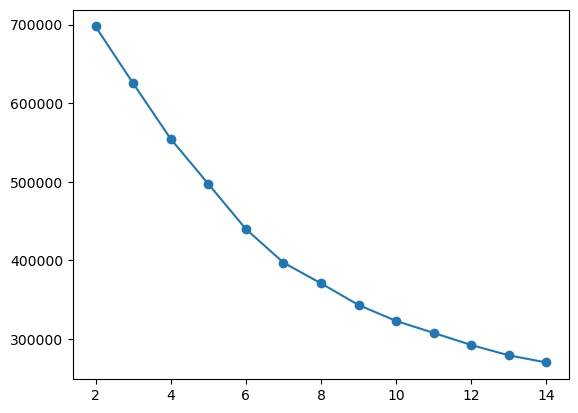

In [22]:
exp=[]
k = range(2,15)
for i in k:
    kmeans= KMeans(n_clusters = i, random_state= 42, n_init=10)
    kmeans.fit(df_scl)
    exp.append(kmeans.inertia_)
plt.plot(k,exp, marker='o',linestyle='-')
plt.show()

In [23]:
opt_k = 4
kmeans=KMeans(n_clusters=opt_k,random_state=42,init="k-means++")
df['Cluster']=kmeans.fit_predict(df_scl)
df[['CustAccountBalance','TransactionAmount (INR)','Age','Cluster']].head()

,CustAccountBalance,TransactionAmount (INR),Age,Cluster
928060,14085.82,500.0,40.0,3
710052,6125.17,70.0,31.0,0
304510,6382.71,401.4,-14.0,1
1044960,2005.37,400.0,-38.0,2
47330,49961.81,410.0,45.0,0


In [24]:
df.dtypes

TransactionID                int32
CustomerID                   int32
CustGender                   int32
CustLocation                 int32
CustAccountBalance         float64
TransactionAmount (INR)    float64
Age                        float64
TransactionYear              int32
TransactionMonth             int32
TransactionDay               int32
TransactionHours             int64
Cluster                      int32
dtype: object

In [25]:
df['TransactionAmount (INR)'] = pd.to_numeric(df['TransactionAmount (INR)'], errors='coerce')
df['CustAccountBalance'] = pd.to_numeric(df['CustAccountBalance'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [26]:
df.groupby("Cluster").mean()

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionAmount (INR),Age,TransactionYear,TransactionMonth,TransactionDay,TransactionHours
Cluster,,,,,,,,,,,
0,55430.590643,49107.702409,0.787041,1921.406316,108449.429680,1596.058462,39.999485,2016.0,3.142924,8.522994,15.434105
1,47434.014266,48971.920997,0.000000,1907.422238,110173.307225,1652.654570,34.112049,2016.0,8.357817,15.711571,15.632387
2,48948.792700,48951.299568,1.000000,991.284476,103554.514383,1389.395662,41.920184,2016.0,8.599244,16.443358,15.340636
3,48516.330674,49056.733390,1.000000,2960.089095,139093.721910,1608.587957,43.722187,2016.0,8.603666,15.918032,15.242289


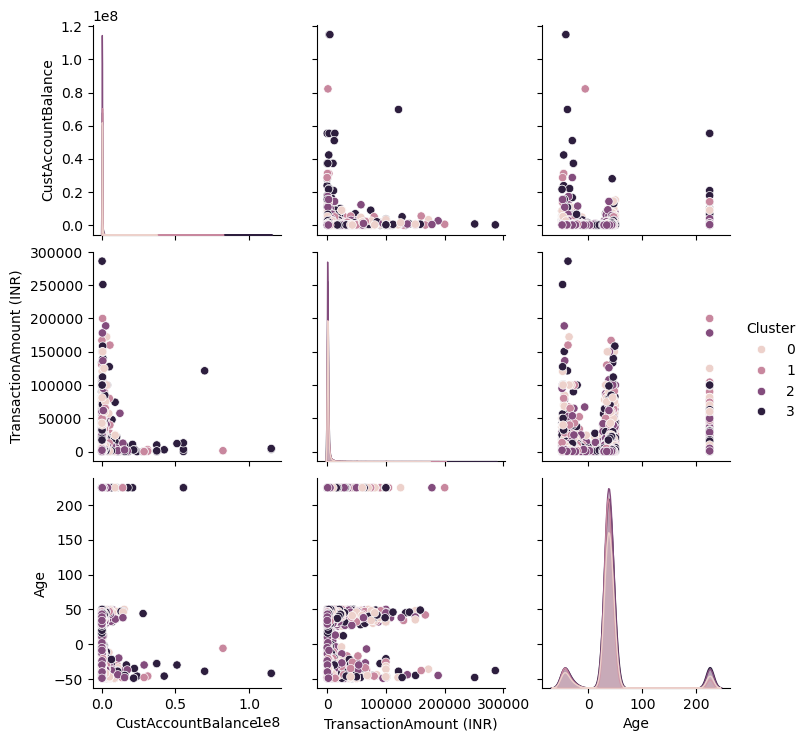

In [27]:
sns.pairplot(df,hue="Cluster", vars=['CustAccountBalance','TransactionAmount (INR)','Age'])
plt.show()